# 시계열 데이터 다루기

In [1]:
from pandas_datareader import data

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 42.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf

오픈소스인 야후 증권을 통한 시계열 데이터

* 시계열 데이터 : 시간의 흐름에 따른 데이터 (주기 필요)

In [4]:
# 야후 증권 데이터 요청
yf.pdr_override()

### 증권 데이터 요청 시 필요한 차원

1. 종목코드 : KIA(종목명) / '000270.KS'
2. 요청 시작일 : '2021-1-1'
3. 요청 종료일 : '2021-12-10'

In [5]:
start_date = '2017-1-1'
end_date = '2017-6-30'

# 증권 데이터 요청 : pandas_datareader.get_data_yahoo('종목코드', '시작일', '종료일')
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [6]:
print(KIA.shape)
KIA.head()

(122, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,39000.0,39600.0,38850.0,39500.0,35970.964844,436193
2017-01-03,39650.0,40900.0,39650.0,40750.0,37109.285156,1158874
2017-01-04,40900.0,41450.0,40550.0,41300.0,37610.148438,1159086
2017-01-05,41300.0,41350.0,40750.0,41100.0,37428.019531,1116473
2017-01-06,40700.0,40850.0,40550.0,40750.0,37109.285156,888652


* Open : 장 시각자격
* High : 장중 상한가
* Low : 장중 하한가
* Close : 장 마감가격

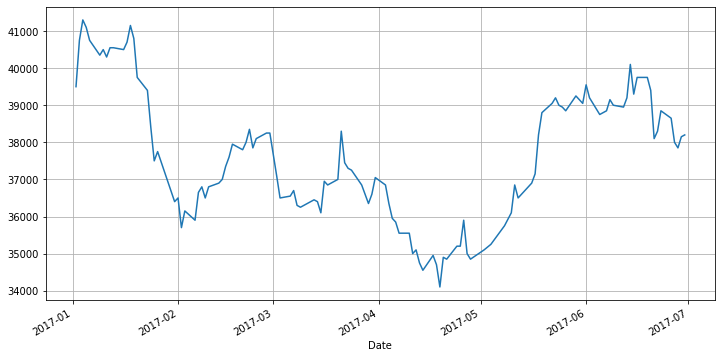

In [7]:
KIA['Close'].plot(figsize=(12, 6), grid=True)

In [8]:
KIA_trunc = KIA[:'2017-4-30']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,39000.0,39600.0,38850.0,39500.0,35970.964844,436193
2017-01-03,39650.0,40900.0,39650.0,40750.0,37109.285156,1158874
2017-01-04,40900.0,41450.0,40550.0,41300.0,37610.148438,1159086
2017-01-05,41300.0,41350.0,40750.0,41100.0,37428.019531,1116473
2017-01-06,40700.0,40850.0,40550.0,40750.0,37109.285156,888652
...,...,...,...,...,...,...
2017-04-24,34850.0,35200.0,34600.0,35200.0,32055.140625,586018
2017-04-25,35200.0,35400.0,35050.0,35200.0,32055.140625,919240
2017-04-26,35450.0,36150.0,35300.0,35900.0,32692.597656,1506801


In [9]:
# 웹 트래픽 : 08. PinkWink Web Traffinc.csv
import pandas as pd
web = pd.read_csv('./08. PinkWink Web Traffic.csv',
                  encoding="utf-8",
                  thousands=',',
                  names=['data', 'hit'],
                  index_col=0)
web.head(3)

,hit
data,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0


In [10]:
web.isnull().sum()

hit    1
dtype: int64

In [11]:
web_not_null = web[web['hit'].notnull()]

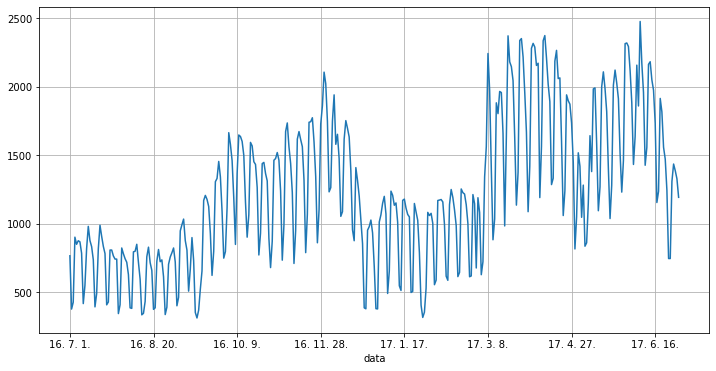

In [12]:
web_not_null['hit'].plot(figsize=(12, 6), grid=True)

* 회귀 : 데이터가 주기성을 이용하여 한 바퀴돌아, 제자리로 돌아오는 것
* 모델 : 1차, 2차, 3차, 15차 등 다항식으로 표현하고 그 결과 값을 이용하여 결정
* 다항식 : 1개 이상의 단항식을 대수의 합으로 연결한 식
* 단항식 : 숫자 또는 몇 개의 문자의 곱으로 이루어짐 

In [13]:
# Numpy의 ployfit을 이용한 회귀 분석
# 주기성 파악
import numpy as np

# 1. 시간축 설정
time = np.arange(len(web_not_null))
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [14]:
# 2. 웹 트래픽 데이터 추출
traffic = web_not_null['hit'].values
traffic

array([ 766.,  377.,  427.,  902.,  850.,  876.,  868.,  785.,  417.,
        550.,  818.,  981.,  877.,  833.,  737.,  393.,  489.,  817.,
        989.,  908.,  835.,  782.,  408.,  429.,  808.,  808.,  765.,
        742.,  742.,  344.,  408.,  823.,  781.,  745.,  719.,  629.,
        386.,  382.,  795.,  799.,  850.,  717.,  595.,  335.,  346.,
        433.,  759.,  829.,  716.,  659.,  375.,  386.,  727.,  812.,
        723.,  736.,  613.,  337.,  391.,  704.,  757.,  788.,  823.,
        721.,  401.,  463.,  948.,  993., 1034.,  877.,  808.,  508.,
        669.,  899.,  732.,  352.,  312.,  369.,  522.,  655., 1170.,
       1207., 1178., 1126.,  929.,  623.,  799., 1307., 1331., 1455.,
       1342., 1090.,  749.,  797., 1117., 1665., 1579., 1461., 1188.,
        849., 1364., 1648., 1637., 1601., 1499., 1159.,  902., 1066.,
       1594., 1568., 1453., 1433., 1265.,  772.,  932., 1439., 1448.,
       1367., 1313.,  895.,  680.,  872., 1464., 1476., 1520., 1464.,
       1239.,  734.,

3. 추출된 데이터를 이용한 간단한 모델 작성

In [15]:
# 모델의 적합성 확인을 위한 사용자 정의 함수
fx = np.linspace(0, time[-1], 1000)

def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [16]:
# 1차 다항식
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)
print(fp1)
f1

[  2.94751137 678.39950595]


poly1d([  2.94751137, 678.39950595])

In [17]:
# 2차 다항식
fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)
print(fp2)
f2

[-1.42164283e-03  3.46498936e+00  6.47092087e+02]


poly1d([-1.42164283e-03,  3.46498936e+00,  6.47092087e+02])

In [18]:
# 3차 다항식
fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)
print(fp3)
f3

[ 3.34072153e-05 -1.96619824e-02  6.11714142e+00  5.67195752e+02]


poly1d([ 3.34072153e-05, -1.96619824e-02,  6.11714142e+00,  5.67195752e+02])

In [19]:
# 15차 다항식
fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)
print(fp15)
f15

[ 2.37543910e-29 -6.18484005e-26  7.30049484e-23 -5.16078535e-20
  2.42917980e-17 -8.00161734e-15  1.88604319e-12 -3.19727279e-10
  3.86604977e-08 -3.26711234e-06  1.87093529e-04 -7.04466696e-03
  1.76802632e-01 -3.15304719e+00  3.27804790e+01  6.17394489e+02]


poly1d([ 2.37543910e-29, -6.18484005e-26,  7.30049484e-23, -5.16078535e-20,
        2.42917980e-17, -8.00161734e-15,  1.88604319e-12, -3.19727279e-10,
        3.86604977e-08, -3.26711234e-06,  1.87093529e-04, -7.04466696e-03,
        1.76802632e-01, -3.15304719e+00,  3.27804790e+01,  6.17394489e+02])

In [20]:
print(error(f1, time, traffic))

430.8597308110963


In [21]:
print(error(f2, time, traffic))

430.62841018946943


In [22]:
print(error(f3, time, traffic))

429.53280466762925


In [23]:
print(error(f15, time, traffic))

330.4777304836984


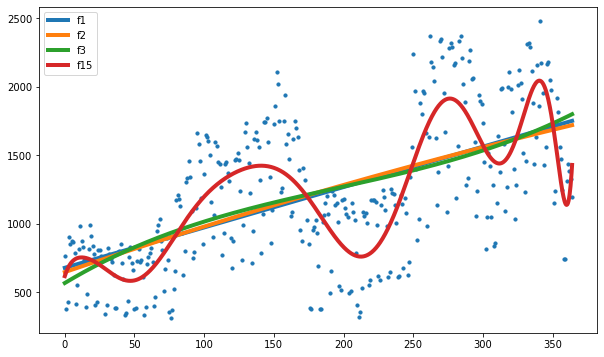

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.legend(loc=2)
plt.show()

1차, 2차, 3차는 별 차이가 없음 -> 1차를 사용

15차의 경우 과적합(overfitting)일 가능성이 높음 -> 모델 부적합

* overfitting이란.
    * 학습 데이터를 과하게 학습하는 것.
    * 일반적으로 학습 데이터는 실제 데이터의 일부이기 때문에, 학습 데이터에 대해 오차가 감소할 수 있지만, 실제 데이터에 대해서는 오차가 증가할 수 있다.

학습 데이터는 실제 데이터의 일부분이기 때문에 실제 데이터를 모두 수집하기 어렵고, 실제 데이터를 수집한다하더라도 모든 데이터를 학습시키기 위한 시간이 측정 불가능한 수준으로 증가할 수 있다.

따라서 학습 데이터만 가지고는 실제 데이터의 오차가 증가하는 시점을 예측하는 것은 매우 어렵다.